In [1]:
import json
import pandas as pd
from datetime import datetime
from datetime import timedelta
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as plticker
import random as ran

## Part 1

Loading Data

In [2]:
with open("logins.json") as json_file:
    json_data = json.load(json_file)

In [3]:
df = pd.read_json('logins.json')
df['Date'] = pd.to_datetime(df['login_time']).dt.date
df['Hour'] = pd.to_datetime(df['login_time']).dt.hour
df['Minute'] = pd.to_datetime(df['login_time']).dt.minute
df.sort_values(by=['login_time'], inplace=True)

Generating groups based on 15 minute intervals

In [4]:
#Starting by generating intervals between login times
df['minshift'] = df['Minute'].shift(1)
df['interval'] = ''
hfilter = df['Hour'] == df['Hour'].shift(1)
df.loc[hfilter, 'interval'] = df['Minute'] - df['minshift']
hfilter2 = df['Hour'] != df['Hour'].shift(1)
df.loc[hfilter2, 'interval'] = (df['Minute']+60) - df['minshift']
df.head(10)

,login_time,Date,Hour,Minute,minshift,interval
6,1970-01-01 20:12:16,1970-01-01,20,12,NaN,NaN
0,1970-01-01 20:13:18,1970-01-01,20,13,12.0,1.0
1,1970-01-01 20:16:10,1970-01-01,20,16,13.0,3.0
3,1970-01-01 20:16:36,1970-01-01,20,16,16.0,0.0
2,1970-01-01 20:16:37,1970-01-01,20,16,16.0,0.0
5,1970-01-01 20:21:41,1970-01-01,20,21,16.0,5.0
10,1970-01-01 20:26:05,1970-01-01,20,26,21.0,5.0
4,1970-01-01 20:26:21,1970-01-01,20,26,26.0,0.0
11,1970-01-01 20:31:03,1970-01-01,20,31,26.0,5.0
12,1970-01-01 20:34:46,1970-01-01,20,34,31.0,3.0


In [5]:
#Counting the minutes between each login time. If the sum goes over 15 then so begins the next group. 
#The label column is a flag to begin the next group which is named sequentially. 
ints = list(df['interval'])
runcum = [0]
labels = []
audit = []
for i in range(1, len(ints)):
    if sum(runcum) < 15:
        runcum.append(ints[i])
        label = 0
        labels.append(label)
        audit.append(sum(runcum))
    else:
        runcum = [ints[i]]
        label = 1
        labels.append(label)
        audit.append(sum(runcum))

In [6]:
labels.insert(0, 0)
audit.insert(0,0)
df['audit'] = audit
df['label'] = labels

In [7]:
df['group'] = df['label'].cumsum()

In [8]:
df.head(30)

,login_time,Date,Hour,Minute,minshift,interval,audit,label,group
6,1970-01-01 20:12:16,1970-01-01,20,12,NaN,NaN,0.0,0,0
0,1970-01-01 20:13:18,1970-01-01,20,13,12.0,1.0,1.0,0,0
1,1970-01-01 20:16:10,1970-01-01,20,16,13.0,3.0,4.0,0,0
3,1970-01-01 20:16:36,1970-01-01,20,16,16.0,0.0,4.0,0,0
2,1970-01-01 20:16:37,1970-01-01,20,16,16.0,0.0,4.0,0,0
5,1970-01-01 20:21:41,1970-01-01,20,21,16.0,5.0,9.0,0,0
10,1970-01-01 20:26:05,1970-01-01,20,26,21.0,5.0,14.0,0,0
4,1970-01-01 20:26:21,1970-01-01,20,26,26.0,0.0,14.0,0,0
11,1970-01-01 20:31:03,1970-01-01,20,31,26.0,5.0,19.0,0,0
12,1970-01-01 20:34:46,1970-01-01,20,34,31.0,3.0,3.0,1,1


In [9]:
df.drop(columns=['label', 'minshift', 'audit'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [10]:
#Examining finished dataframe
df.head(25)

,login_time,Date,Hour,Minute,interval,group
0,1970-01-01 20:12:16,1970-01-01,20,12,NaN,0
1,1970-01-01 20:13:18,1970-01-01,20,13,1.0,0
2,1970-01-01 20:16:10,1970-01-01,20,16,3.0,0
3,1970-01-01 20:16:36,1970-01-01,20,16,0.0,0
4,1970-01-01 20:16:37,1970-01-01,20,16,0.0,0
5,1970-01-01 20:21:41,1970-01-01,20,21,5.0,0
6,1970-01-01 20:26:05,1970-01-01,20,26,5.0,0
7,1970-01-01 20:26:21,1970-01-01,20,26,0.0,0
8,1970-01-01 20:31:03,1970-01-01,20,31,5.0,0
9,1970-01-01 20:34:46,1970-01-01,20,34,3.0,1


In [11]:
#Generating descriptive statistics
logsbygroup = df.groupby("group").agg({'login_time': 'min', 'interval': 'count'})
logsbygroup.rename(columns={'interval':"Num of Logs"}, inplace=True)
logsbyday = df.groupby("Date").agg({'interval': 'max', 'Minute': 'count'})
logsbyday.rename(columns={'interval': 'Max time between logins', 'Minute': 'number of logins'}, inplace=True)
logsbyday.reset_index(inplace=True)
logsbyday['mean#logs'] = logsbyday['number of logins'].expanding().mean()
logsbyday['Rolling_avg'] = logsbyday['number of logins'].rolling(10).mean()
day_group = df.groupby(["Date", 'group']).agg({'interval': 'mean', 'Minute': 'count'})

In [12]:
logsbygroup['Rolling_avg'] = logsbygroup['Num of Logs'].rolling(500).mean()
logsbygroup['mean#logs'] = logsbygroup['Num of Logs'].expanding().mean()

In [13]:
avgint = df.interval.mean() #Average wait between log ins overall
avglogday = logsbyday['number of logins'].mean() #Average count of logsins per day
maxint = df.interval.max() #Maximum wait between logins overall
avgday = day_group['interval'].mean() #Average wait between logsins per day
maxgplogs = logsbygroup['Num of Logs'].max() #Maximum number of logins in 1 15 minute period
avggplogs = logsbygroup['Num of Logs'].mean() #Avg number of logs per 15 minute period

Report

In [14]:
print(f'On average someone logs in every {round(avgint)} minutes.')
print(f'There are approximately {round(avglogday)} logins per day, although this average is trending upwards.')
print(f'The longest period of time between logins was {round(maxint)} minutes.')
print(f'The maximum number of logins in one fifteen minute period was {maxgplogs}, while the average was {round(avggplogs)}')

On average someone logs in every 2 minutes.
There are approximately 904 logins per day, although this average is trending upwards.
The longest period of time between logins was 68 minutes.
The maximum number of logins in one fifteen minute period was 69, while the average was 11


Vizualizations

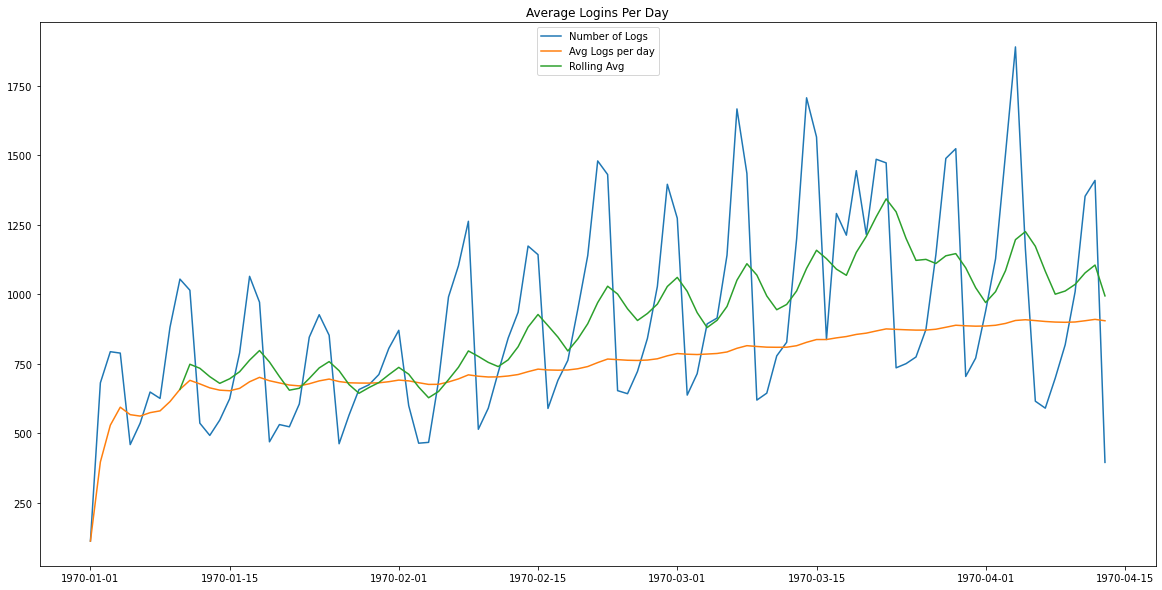

In [15]:
plt.figure(figsize=(20, 10))
plt.plot(logsbyday['Date'], logsbyday['number of logins'], label='Number of Logs')
plt.plot(logsbyday['Date'], logsbyday['mean#logs'], label = 'Avg Logs per day')
plt.plot(logsbyday['Date'], logsbyday['Rolling_avg'], label = 'Rolling Avg')
leg = plt.legend(loc='upper center')
title = plt.title('Average Logins Per Day')
plt.show()

We can see here that the average number of logs per day does appear to be growing, though it may have peaked in late March. There does appear to be seasonality with peaks each week. 

<function matplotlib.pyplot.show(close=None, block=None)>

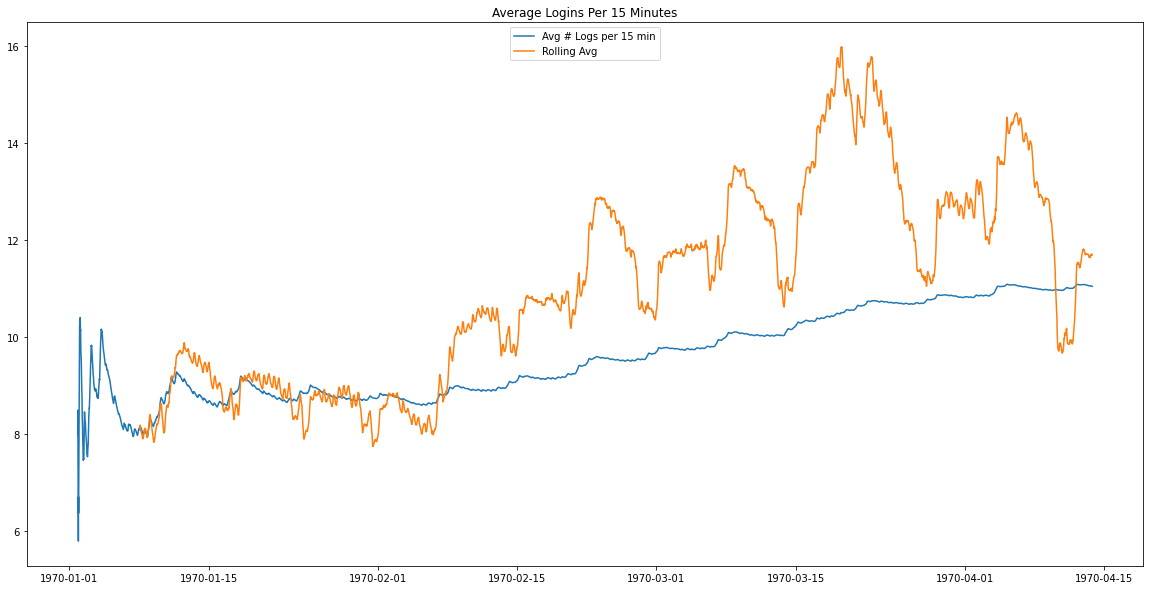

In [16]:
plt.figure(figsize=(20, 10))
plt.plot(logsbygroup['login_time'], logsbygroup['mean#logs'], label = 'Avg # Logs per 15 min')
plt.plot(logsbygroup['login_time'], logsbygroup['Rolling_avg'], label = 'Rolling Avg')
leg = plt.legend(loc='upper center')
title = plt.title('Average Logins Per 15 Minutes')
plt.show


The trend persists when considering just the number of logins per 15 minute period. 

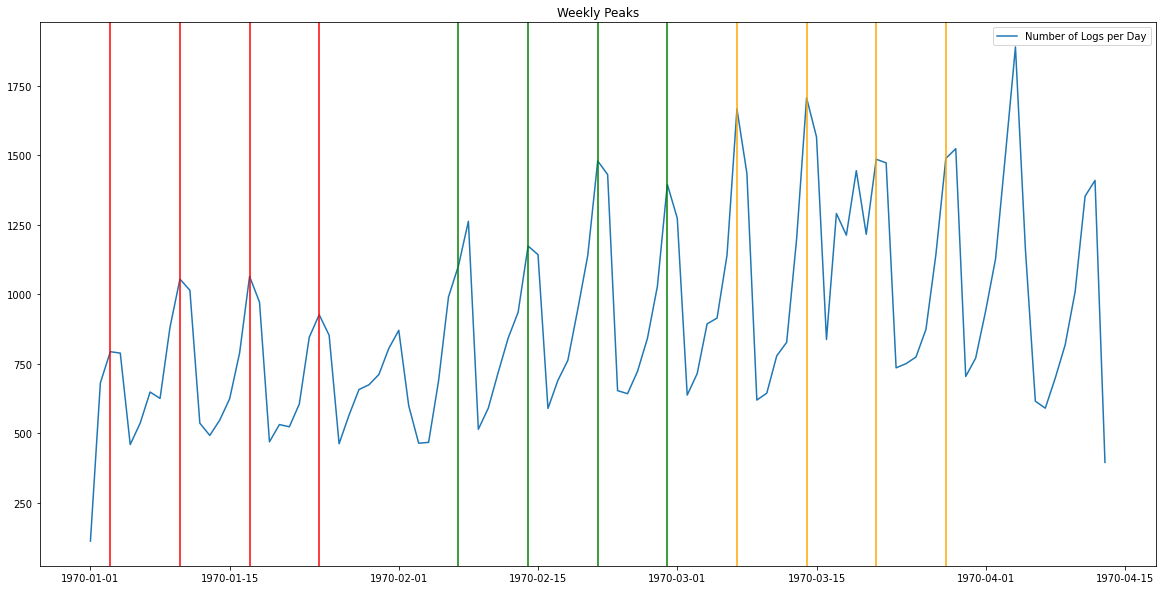

In [17]:
plt.figure(figsize=(20, 10))
plt.plot(logsbyday['Date'], logsbyday['number of logins'], label='Number of Logs per Day')
leg = plt.legend(loc='upper right')
plt.axvline(datetime(1970, 1, 3), c = 'red')
plt.axvline(datetime(1970, 1, 10), c = 'red')
plt.axvline(datetime(1970, 1, 17), c = 'red')
plt.axvline(datetime(1970, 1, 24), c = 'red')
plt.axvline(datetime(1970, 2, 7), c = 'green')
plt.axvline(datetime(1970, 2, 14), c = 'green')
plt.axvline(datetime(1970, 2, 21), c = 'green')
plt.axvline(datetime(1970, 2, 28), c = 'green')
plt.axvline(datetime(1970, 3, 7), c = 'orange')
plt.axvline(datetime(1970, 3, 14), c = 'orange')
plt.axvline(datetime(1970, 3, 21), c = 'orange')
plt.axvline(datetime(1970, 3, 28), c = 'orange')
title = plt.title('Weekly Peaks')
plt.show()

The peaks in usage seem to correspond to weekends. Each line represents a Saturday.

Red = January

Green = February

Orange = March

# Part 2

What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?

I think that average distance would illustrate more drivers going between both cities. We could concider the mean avg_dist after beginning the experiment and then compare it to the mean from before the free tolls. 

Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:


    a) how you will implement the experiment: I'd conduct an a/b test. Provide a promotion to half of the users for 1 month. Compare the target metrics of the two groups to each other and then to the previous month's metrics.
    
    b) what statistical test(s) you will conduct to verify the significance of the
    observation: For the month of January there were 50000 rows. Since Gotham and Metropolis are both large metropolitain areas I think it would be safe to plan for a similair amount of entries for those cities. Assuming 30000 (to be safe), a sample of 7275 would be needed to achieve a confidence level of 95% and a confidence interval of 1 according to this (https://www.surveysystem.com/sscalc.htm) sample size calculator. Permutation sample 8000 from each group in the 30000 total population and then generate the p value for results against the null hypothesis that both groups would have the same average distance traveled. 

    c) how you would interpret the results and provide recommendations to the city
    operations team along with any caveats. I would begin with the reccommendation either for or against the toll reimbursement based on my findings. From there I would build a case for my suggestion by briefly explaining my methodology and results. A p value of less than 0.05 would allow me to suggest moving forward with the initiative, but I would be clear that the p-value only represented that a small fraction of the simulated results would occur even if the null hypothesis were true and that a low p-value does not guarantee success. 


# Part 3

In [18]:
#Loading dataset
ultimate = pd.read_csv('ultimate.csv')

In [19]:
ultimate.head()

,Unnamed: 0,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [20]:
#Checking datatypes and summary statistics
ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              50000 non-null  int64  
 1   city                    50000 non-null  object 
 2   trips_in_first_30_days  50000 non-null  int64  
 3   signup_date             50000 non-null  object 
 4   avg_rating_of_driver    41878 non-null  float64
 5   avg_surge               50000 non-null  float64
 6   last_trip_date          50000 non-null  object 
 7   phone                   49604 non-null  object 
 8   surge_pct               50000 non-null  float64
 9   ultimate_black_user     50000 non-null  bool   
 10  weekday_pct             50000 non-null  float64
 11  avg_dist                50000 non-null  float64
 12  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(2), object(4)
memory usage: 4.6+ MB


In [21]:
#Several null values for phone, and driver ratings.For phone I'll just replace with a dummy phone number.
ultimate.describe()

,Unnamed: 0,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,24999.500000,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,14433.901067,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,12499.750000,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,24999.500000,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,37499.250000,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,49999.000000,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [22]:
for i in ultimate.columns[1:]:
    print (i)

city
trips_in_first_30_days
signup_date
avg_rating_of_driver
avg_surge
last_trip_date
phone
surge_pct
ultimate_black_user
weekday_pct
avg_dist
avg_rating_by_driver


In [23]:
ultimate.city.value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

(array([4.875e+04, 1.043e+03, 1.600e+02, 3.200e+01, 1.100e+01, 3.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  0. ,  12.5,  25. ,  37.5,  50. ,  62.5,  75. ,  87.5, 100. ,
        112.5, 125. ]),
 <BarContainer object of 10 artists>)

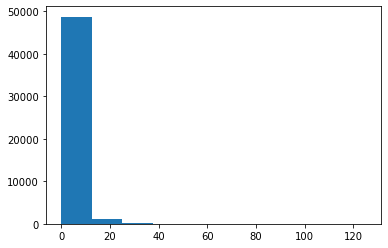

In [24]:
fig, ax = plt.subplots()
ax.hist(ultimate['trips_in_first_30_days'])

In [25]:
manytrips = ultimate[ultimate['trips_in_first_30_days'] > 40]

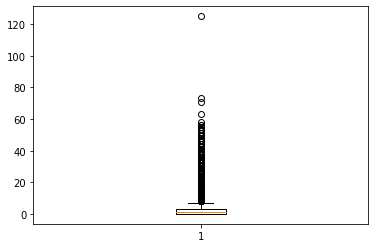

In [26]:
fig, ax = plt.subplots()
ax.boxplot(ultimate['trips_in_first_30_days'])
plt.show()

In [27]:
manytrips['trips_in_first_30_days'].median()

48.0

In [28]:
len(manytrips)

35

In [29]:
#Lots of outliers here. In this case I'll reduce it to prevent the really large numbers from causing too much sway.
ultimate = ultimate[ultimate['trips_in_first_30_days'] < 28]

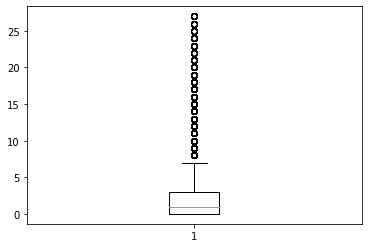

In [30]:
fig, ax = plt.subplots()
ax.boxplot(ultimate['trips_in_first_30_days'])
plt.show()

In [31]:
ultimate['signup_date'].value_counts()

2014-01-18    2943
2014-01-25    2877
2014-01-11    2399
2014-01-24    2278
2014-01-17    2141
2014-01-31    2099
2014-01-19    2024
2014-01-10    2011
2014-01-06    1757
2014-01-01    1732
2014-01-26    1705
2014-01-23    1599
2014-01-07    1482
2014-01-04    1480
2014-01-30    1469
2014-01-09    1431
2014-01-16    1428
2014-01-22    1360
2014-01-05    1340
2014-01-12    1334
2014-01-20    1291
2014-01-28    1279
2014-01-08    1272
2014-01-27    1232
2014-01-21    1226
2014-01-03    1211
2014-01-29    1192
2014-01-14    1116
2014-01-15    1107
2014-01-13    1043
2014-01-02    1002
Name: signup_date, dtype: int64

In [32]:
#No erroneous values there. 
ultimate.avg_rating_of_driver.isnull().sum()

8122

In [33]:
ultimate.avg_rating_of_driver.count()

41738

In [34]:
len(ultimate)

49860

(array([2.5600e+02, 7.0000e+00, 2.1700e+02, 1.2000e+02, 1.0000e+02,
        1.4000e+03, 1.4480e+03, 4.8340e+03, 5.4020e+03, 2.7954e+04]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

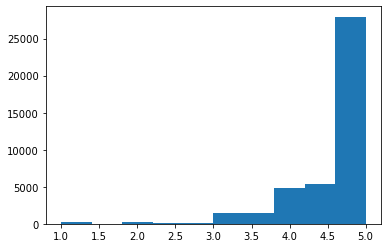

In [35]:
fig, ax = plt.subplots()
ax.hist(ultimate['avg_rating_of_driver'])

(array([2.5600e+02, 7.0000e+00, 2.1700e+02, 1.2000e+02, 1.0000e+02,
        1.4000e+03, 1.4480e+03, 4.8340e+03, 5.4020e+03, 3.6076e+04]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

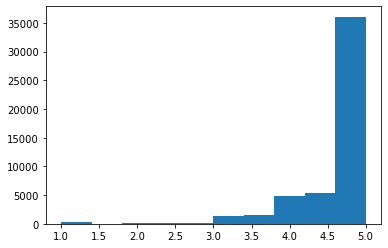

In [36]:
#That's too many missing values to drop. I'll fill with the median here since the data is skewed.
drivermed = ultimate['avg_rating_of_driver'].median()
ultimate['avg_rating_of_driver'].fillna(drivermed, inplace=True)
#Lets take a look at what this does to the distribution
fig, ax = plt.subplots()
ax.hist(ultimate['avg_rating_of_driver'])

In [37]:
#Distribution looks roughly the same. Moving on. 


(array([4.8701e+04, 8.5800e+02, 2.3400e+02, 3.8000e+01, 1.7000e+01,
        1.0000e+01, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <BarContainer object of 10 artists>)

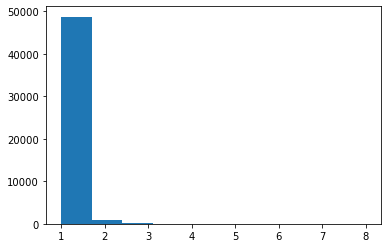

In [38]:
fig, ax = plt.subplots()
ax.hist(ultimate['avg_surge'])

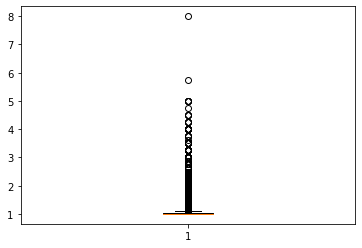

In [39]:
fig, ax = plt.subplots()
ax.boxplot(ultimate['avg_surge'])
plt.show()

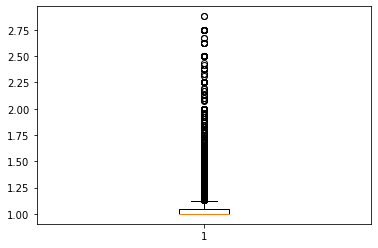

In [40]:
#I'll drop the most extreme outliers.
ultimate = ultimate[ultimate['avg_surge'] < 3]
fig, ax = plt.subplots()
ax.boxplot(ultimate['avg_surge'])
plt.show()

In [41]:
type(ultimate.last_trip_date.iloc[1])

str

In [42]:
#The dates for the last trip are strings. I'll convert those and signup date to datetimes. If there is an error it will mean 
#There is a problem with one of these features.
sudates = pd.to_datetime(ultimate['signup_date'])

In [43]:
ultimate['dt_signup_date'] = sudates
type(ultimate['dt_signup_date'].iloc[1])

pandas._libs.tslibs.timestamps.Timestamp

In [44]:
ltdate = pd.to_datetime(ultimate['last_trip_date'])
ultimate['dt_last_trip_date'] = sudates
type(ultimate['dt_last_trip_date'].iloc[1])

pandas._libs.tslibs.timestamps.Timestamp

In [45]:
print(min(ultimate['dt_signup_date']))
print(max(ultimate['dt_signup_date']))
print(min(ultimate['dt_last_trip_date']))
print(max(ultimate['dt_last_trip_date']))

2014-01-01 00:00:00
2014-01-31 00:00:00
2014-01-01 00:00:00
2014-01-31 00:00:00


In [46]:
ultimate['phone'].value_counts()

iPhone     34368
Android    14952
Name: phone, dtype: int64

In [47]:
sum(ultimate['phone'].isnull())

395

In [48]:
#Wow, no third party devices. Let's just take care of null values. Here I'll fill with a random choice between the two, but
#more heavily weighted toward iPhone. It shouldn't be a problem with such a small amount of nulls. 
phonelist = ['iPhone', 'iPhone', 'iPhone', 'Android']
ultimate['phone'] = ultimate['phone'].fillna('iPhone')

In [49]:
ultimate[ultimate['phone'].isnull()]

,Unnamed: 0,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,dt_signup_date,dt_last_trip_date


In [50]:
ultimate.shape

(49715, 15)

<AxesSubplot:>

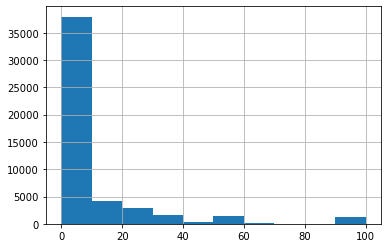

In [51]:
ultimate['surge_pct'].hist()

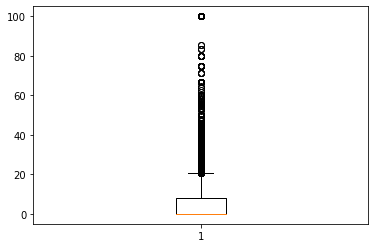

In [52]:
fig, ax = plt.subplots()
ax.boxplot(ultimate['surge_pct'])
plt.show()

In [53]:
#Reducing extremety of outliers
ultimate = ultimate[ultimate['surge_pct'] < 40]

In [54]:
ultimate.ultimate_black_user.value_counts()

False    28221
True     18194
Name: ultimate_black_user, dtype: int64

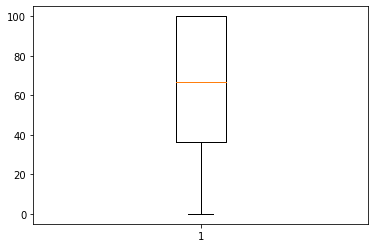

In [55]:
fig, ax = plt.subplots()
ax.boxplot(ultimate.weekday_pct)
plt.show()

<AxesSubplot:>

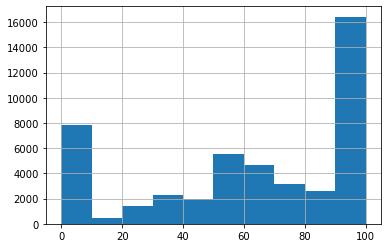

In [56]:
ultimate.weekday_pct.hist()

<AxesSubplot:>

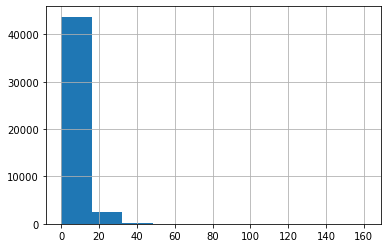

In [57]:
ultimate.avg_dist.hist()

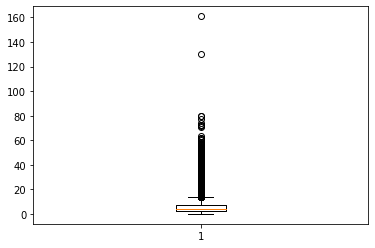

In [58]:
fig, ax = plt.subplots()
ax.boxplot(ultimate.avg_dist)
plt.show()

In [59]:
len(ultimate[ultimate['avg_dist'] > 30])

388

In [60]:
#Reducing outliers
ultimate = ultimate[ultimate['avg_dist'] < 30]

<AxesSubplot:>

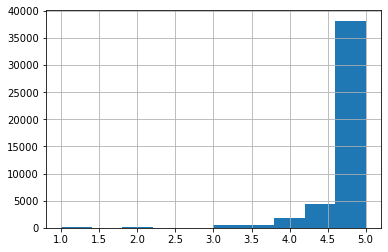

In [61]:
ultimate.avg_rating_by_driver.hist()

## How much data was retained?

In [62]:
#The nature of the rating system prevents extreme outliers
print("After cleaning " + str(round(len(ultimate)/50000, 2)) + " % of the data was retained")

After cleaning 0.92 % of the data was retained


In [63]:
#Creating a target variable
conditions = [
    (ultimate['last_trip_date'] >= "2014-06-01"),
    (ultimate['last_trip_date'] < "2014-06-01"),
    ]
values = [1, 0]
ultimate['target'] = np.select(conditions, values)
ultimate.head()

,Unnamed: 0,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,dt_signup_date,dt_last_trip_date,target
0,0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,2014-01-25,2014-01-25,1
1,1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,2014-01-29,2014-01-29,0
2,2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,2014-01-06,2014-01-06,0
3,3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,2014-01-10,2014-01-10,1
4,4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,2014-01-27,2014-01-27,0


In [64]:
len(ultimate)

46027

Modeling:
I will start with logistic regression as a baseline for model performance.
I will model using logistic regression, random forrest, and K-nearest-neighbor.
I will be looking at a combination of f-1 score and precision of 1 as well as recall of 0. I do not want to waste resources on users who would not be active, nor do I want to miss potentially active users. 

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [66]:
#Dropping dates and interval columns because they invalidate the model. These features will not be available for future users
#that the model would be used to predict.
ult = ultimate.drop(columns = ['signup_date', 'last_trip_date', 'dt_signup_date', 'dt_last_trip_date'])

In [67]:
ult.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46027 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              46027 non-null  int64  
 1   city                    46027 non-null  object 
 2   trips_in_first_30_days  46027 non-null  int64  
 3   avg_rating_of_driver    46027 non-null  float64
 4   avg_surge               46027 non-null  float64
 5   phone                   46027 non-null  object 
 6   surge_pct               46027 non-null  float64
 7   ultimate_black_user     46027 non-null  bool   
 8   weekday_pct             46027 non-null  float64
 9   avg_dist                46027 non-null  float64
 10  avg_rating_by_driver    45860 non-null  float64
 11  target                  46027 non-null  int32  
dtypes: bool(1), float64(6), int32(1), int64(2), object(2)
memory usage: 4.1+ MB


In [68]:
#I cleaned avg rating OF driver, but forgot avg rating BY driver. Taking care of now
bydrivermedian = ult['avg_rating_by_driver'].median()
ult['avg_rating_by_driver'] = ult['avg_rating_by_driver'].fillna(bydrivermedian)

In [69]:
#Seperating numerical features from categorical
ultn = ult[['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver']]
ultc = ult[['city', 'phone', 'ultimate_black_user']]
target = ult['target']

In [70]:
print(len(ult))
print(len(ultn))
print(len(ultc))
print(len(target))

46027
46027
46027
46027


In [71]:
#Scaling numerical features
scaler = StandardScaler()
ultscaled = pd.DataFrame(scaler.fit_transform(ultn), columns= ultn.columns)

In [72]:
#Creating dummy variables
ultc = pd.get_dummies(ultc)

In [73]:
ultc.head()

,ultimate_black_user,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,True,0,1,0,0,1
1,False,1,0,0,1,0
2,False,1,0,0,0,1
3,True,0,1,0,0,1
4,False,0,0,1,1,0


In [74]:
ultc['ultimate_black_user'] = ultc['ultimate_black_user'].astype(int)

In [75]:
ultc.reset_index(drop=True, inplace=True)
ultscaled.reset_index(drop=True, inplace=True)

In [76]:
df = pd.concat([ultscaled, ultc], axis = 1)

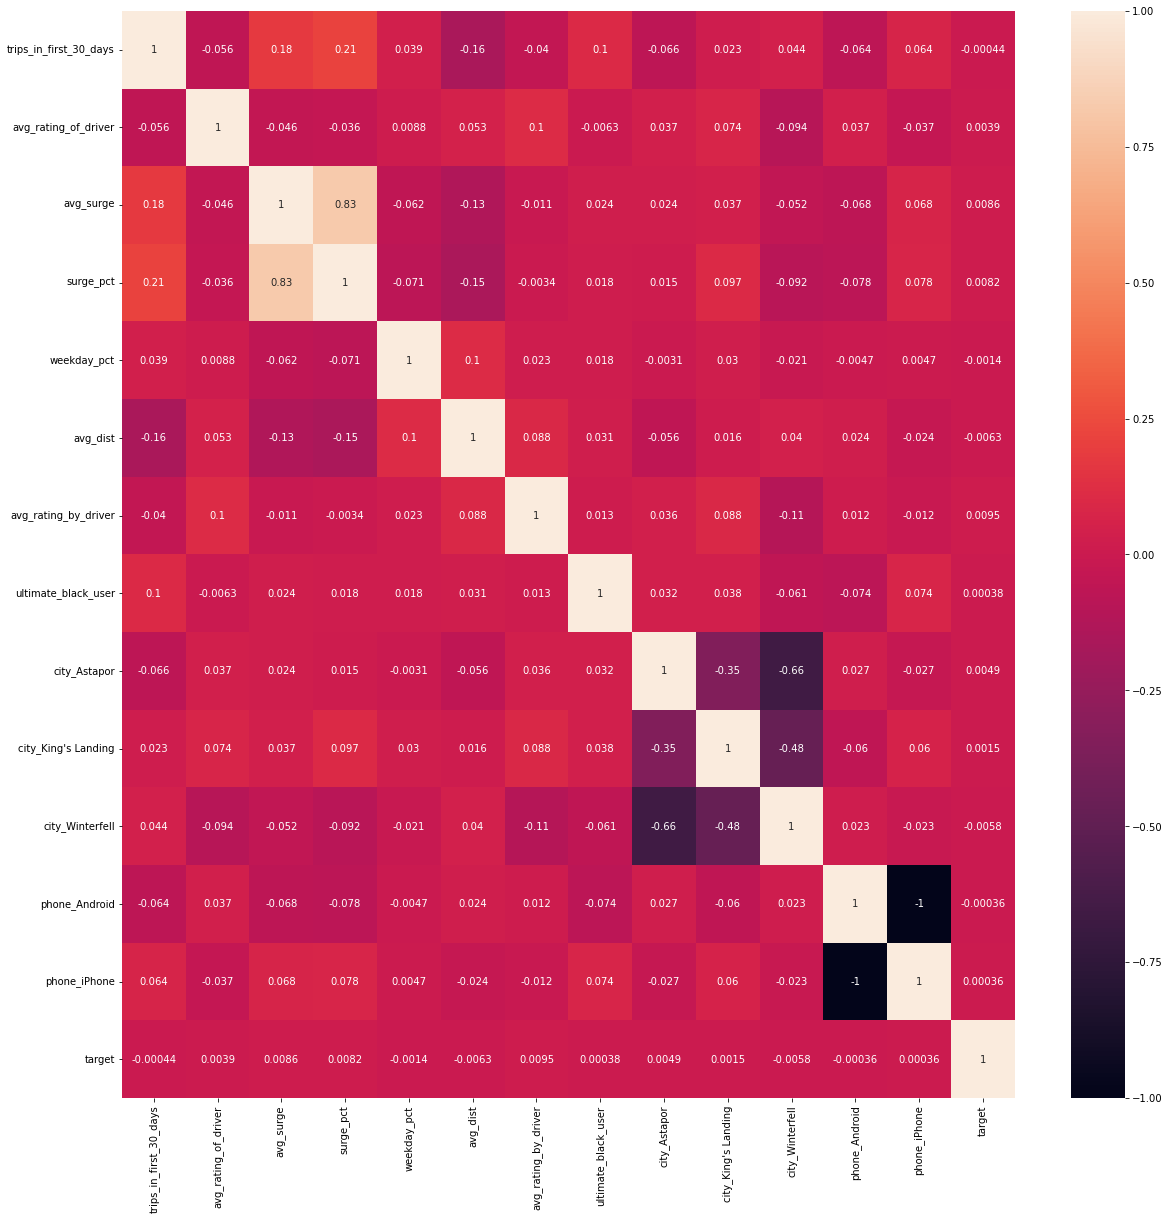

In [107]:
heatmap = df
heatmap['target'] = target
plt.figure(figsize = (20, 20))
sns.heatmap(heatmap.corr(), annot=True)
plt.show()

In [78]:
#Seperating into testing and training sets
X = df
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import itertools

In [81]:
#Creating baseline model
lrmodel = LogisticRegression()
lrmodel.fit(X_train, y_train)
lr_y_pred = lrmodel.predict(X_test)
lr_accuracy = lrmodel.score(X_test, y_test)
lr_f1 = f1_score(y_test, lr_y_pred, average='weighted')

In [82]:
print('Logist Regression: Accuracy=%.3f' % (lr_accuracy))
print('Logist Regression: f1-score=%.3f' % (lr_f1))

Logist Regression: Accuracy=0.722
Logist Regression: f1-score=0.713


In [83]:
class_names=[0, 1]

In [84]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], '.2f'),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.tight_layout()

Normalized confusion matrix


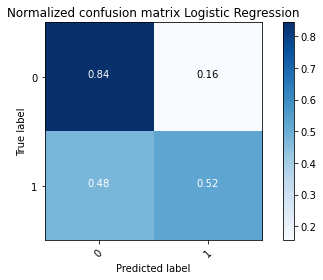

In [87]:
cnf_matrix = confusion_matrix(y_test, lr_y_pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Normalized confusion matrix Logistic Regression')

The baseline model is very good at predicting who will not be active, but overpredicts inactive users causing it to miss nearly half of all active users. In this case I believe it would be better to overpredict active users rather than miss too many of them.

In [91]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,log_loss
from sklearn.ensemble import RandomForestClassifier

Random Forest

In [92]:
#tuning
"""n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)"""

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [93]:
"""rf_random.best_params_"""

{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [95]:
clf = RandomForestClassifier(n_estimators=1600, min_samples_split = 2, min_samples_leaf = 4, max_features = 'sqrt', \
                            max_depth = 10, bootstrap = True)
model_res = clf.fit(X_train, y_train)
rfy_pred = model_res.predict(X_test)
rfy_pred_prob = model_res.predict_proba(X_test)
rf_probs = rfy_pred_prob[:,1]
rfac = accuracy_score(y_test, rfy_pred)

rff1 = f1_score(y_test, rfy_pred, average='weighted')
rfcm = confusion_matrix(y_test, rfy_pred)

print('Random Forest: Accuracy=%.3f' % (rfac))

print('Random Forest: f1-score=%.3f' % (rff1))

Random Forest: Accuracy=0.783
Random Forest: f1-score=0.781


Normalized confusion matrix


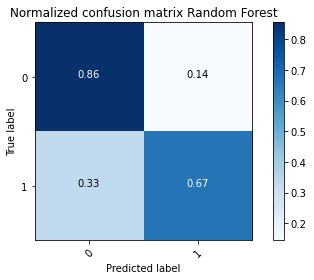

In [97]:
cnf_matrix = confusion_matrix(y_test, rfy_pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Normalized confusion matrix Random Forest')

Better f1, but still missing more active users than I'd like. 

In [105]:
feature_importances = pd.DataFrame(clf.feature_importances_, index = X.columns, columns = ['importance']).sort_values('importance', ascending = False)
print(feature_importances.head(10))

                        importance
avg_rating_by_driver      0.162527
surge_pct                 0.152127
weekday_pct               0.120502
avg_surge                 0.114159
city_King's Landing       0.112915
trips_in_first_30_days    0.062510
avg_dist                  0.052456
ultimate_black_user       0.051164
phone_iPhone              0.044689
phone_Android             0.044225


KNN

In [99]:
from sklearn.neighbors import KNeighborsClassifier

In [100]:
#Tuning
test_scores = []
train_scores = []

for i in range(1,20):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [101]:
test_scores.index(max(test_scores))
#Here an index of 16 indicates 17 neighbors

16

In [102]:
knn = KNeighborsClassifier(17)
knn.fit(X_train,y_train)
knny_pred = knn.predict(X_test)
knny_pred_prob = knn.predict_proba(X_test)
knn_probs = knny_pred_prob[:,1]
knnac = accuracy_score(y_test, knny_pred)

knnf1 = f1_score(y_test, knny_pred, average='weighted')
knncm = confusion_matrix(y_test, knny_pred)

print('KNN: Accuracy=%.3f' % (knnac))

print('KNN: f1-score=%.3f' % (knnf1))

KNN: Accuracy=0.761
KNN: f1-score=0.759


Normalized confusion matrix


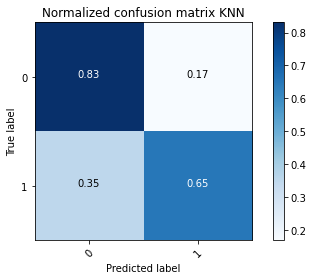

In [104]:
cnf_matrix = confusion_matrix(y_test, knny_pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Normalized confusion matrix KNN')

## Results
It seems that Random Forest is going to be the best model. Not only does it have the highest f-1 score, but it also misses the fewest amount of true active users. From the heatmap I can see that the target does not have any strong correlation to any of the features in particular. However, the random forest classifier conciders average rating by driver and surge pricing to be the most important factors that it concidered when making predictions. This seems to suggest what might seem obvious in retrospect: drivers are more likely to remain active when they are making better money and are happier with their customers. 